In [3]:
import numpy as np

np.random.seed(2**24) #random seed for consistency

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimesions 3x20"


mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimesions 3x20"

Using the code above, we created two 3x20 datasets - one dataset for each w1, and w2 -
where each column can be pictured as a 3-dimensional vector so that our dataset will have the form 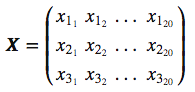

Just to get a rough idea how to let us plot them in 3D scatter plot



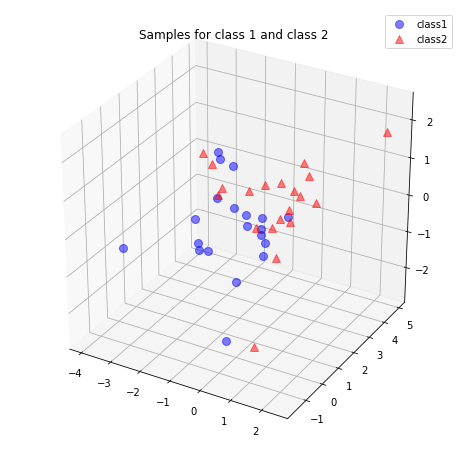

In [4]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, color='red', alpha=0.5, label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

# taking the whole dataset ignoring the class labels
because we don't need class labels for PCA analysis, let us merge the samples for our 2 classes into one 3x 40- dimensional array

In [5]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3, 40), "the matrix has not the dimension 3x40"

## Computing the d-dimensional mean vector


In [6]:
mean_x = np.mean(all_samples[0, :])
mean_y = np.mean(all_samples[1, :])
mean_z = np.mean(all_samples[2, :])

mean_vector = np.array([[mean_x], [mean_y],[mean_z]])
# which is weight of values 
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[ 0.25946217]
 [ 0.45594438]
 [ 0.74286974]]


##  a) Computing the Scatter Matrix
The Scatter matrix is computed by the following equation:
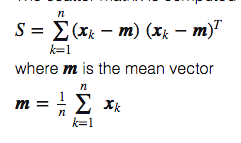

In [7]:
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[ 65.14124765  -0.41778387  19.78436456]
 [ -0.41778387  62.40160959  -2.48732818]
 [ 19.78436456  -2.48732818  54.18231651]]


## b) Computing the Covariance Matrix
(alternatively to the scatter matrix)

Alternatively, instead of calculating the scatter matrix, we could also calculate the covariance matrix using the in-built numpy.cov() function. The equations for the covariance matrix and scatter matrix are very similar, the only difference is, that we use the scaling factor 1N−11N−1 (here: 140−1=139140−1=139) for the covariance matrix. Thus, their eigenspaces will be identical (identical eigenvectors, only the eigenvalues are scaled differently by a constant factor).


In [8]:
cov_mat = np.cov([all_samples[0,:], all_samples[1,:], all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[ 1.6702884  -0.01071241  0.5072914 ]
 [-0.01071241  1.60004127 -0.06377765]
 [ 0.5072914  -0.06377765  1.38929017]]


# 4. Computing eigenvectors and corresponding eigen values
To show that the eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix, let us put an assert statement into the code. Also, we will see that the eigenvalues were indeed scaled by the factor 39 when we derived it from the scatter matrix.


In [9]:
# eigenvectors and values for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and values for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all(), 'Eigenvectors are not identical'
    
    print('Eigenvector {}: \n{}'.format(i+1, eigvec_sc))
    print('Eigenvalue {} from scatter matrix: {}'.format(i+1, eig_val_sc[i]))
    print('Eigenvalue {} from covariance matrix: {}'.format(i+1, eig_val_cov[i]))
    print('Scaling factor: ', eig_val_sc[i]/eig_val_cov[i])
    print(40 * '-')


Eigenvector 1: 
[[-0.60114812]
 [ 0.07385865]
 [ 0.79571718]]
Eigenvalue 1 from scatter matrix: 39.0047577194338
Eigenvalue 1 from covariance matrix: 1.0001219928059943
Scaling factor:  39.0
----------------------------------------
Eigenvector 2: 
[[-0.78914145]
 [ 0.10213371]
 [-0.60566036]]
Eigenvalue 2 from scatter matrix: 80.37967580355512
Eigenvalue 2 from covariance matrix: 2.0610173282962854
Scaling factor:  39.0
----------------------------------------
Eigenvector 3: 
[[ 0.1260028 ]
 [ 0.992025  ]
 [ 0.00311257]]
Eigenvalue 3 from scatter matrix: 62.340740226396804
Eigenvalue 3 from covariance matrix: 1.5984805186255577
Scaling factor:  39.0
----------------------------------------


Checking the eigenvector-eigenvalue calculation

Let us quickly check that the eigenvector-eigenvalue calculation is correct and satisfy the equation

In [10]:
for i in range(len(eig_val_sc)):
    eigv = eig_vec_sc[:,i].reshape(1,3).T
    np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv), eig_val_sc[i] * eigv, decimal=6, err_msg='', verbose=True)